# Analisis Penyakit Jantung Menggunakan Support Vector Machine (SVM)

Penyakit jantung merupakan salah satu penyebab utama kematian di dunia sehingga diperlukan metode deteksi dini yang akurat. Dengan memanfaatkan data medis pasien, machine learning dapat digunakan untuk membantu proses prediksi penyakit jantung secara otomatis.

Pada tugas akhir ini digunakan algoritma **Support Vector Machine (SVM)** untuk melakukan klasifikasi pasien ke dalam dua kelas, yaitu:
- Pasien **tidak mengidap penyakit jantung**
- Pasien **mengidap penyakit jantung**

SVM dipilih karena kemampuannya dalam menangani data numerik berdimensi tinggi serta membentuk batas keputusan yang optimal.

In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Dataset penyakit jantung dimuat menggunakan pustaka pandas.  
Tahap ini bertujuan untuk memastikan struktur data, tipe data setiap fitur,  
serta memastikan bahwa dataset siap digunakan untuk proses pemodelan.

In [27]:
df = pd.read_csv("heart.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Visualisasi Distribusi Target

Visualisasi distribusi target dilakukan untuk mengetahui perbandingan jumlah pasien
yang mengidap penyakit jantung dan yang tidak. Hal ini penting untuk melihat apakah
dataset seimbang atau tidak.

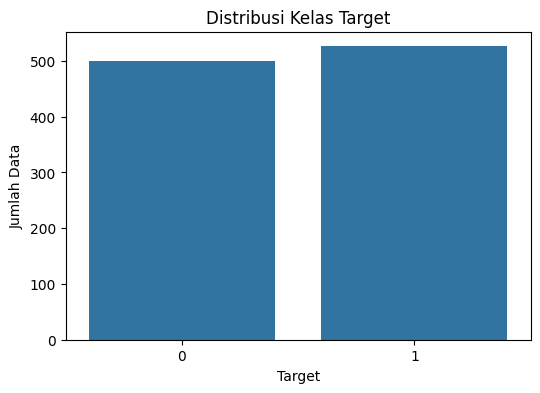

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Kelas Target')
plt.show()

## Pembagian Data dan Standardisasi

Dataset dibagi menjadi data latih dan data uji dengan rasio 80:20.
Selanjutnya dilakukan standardisasi data menggunakan **StandardScaler**
karena algoritma SVM sangat sensitif terhadap perbedaan skala antar fitur.

In [29]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training Model Support Vector Machine (SVM)

Pada tahap ini dilakukan pelatihan model Support Vector Machine menggunakan
kernel **Radial Basis Function (RBF)**.

Parameter **probability=True** digunakan agar model dapat menghasilkan
probabilitas kelas, sehingga hasil prediksi dapat diinterpretasikan sebagai
kemungkinan pasien termasuk dalam kelas tertentu.

In [30]:
svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True,   
    random_state=42
)

svm.fit(X_train_scaled, y_train)

SVC(C=1, probability=True, random_state=42)

## Evaluasi Model

Model yang telah dilatih kemudian diuji menggunakan data uji.
Evaluasi dilakukan dengan menghitung nilai accuracy, classification report,
serta confusion matrix untuk melihat performa klasifikasi secara menyeluruh.

Accuracy: 0.926829268292683

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



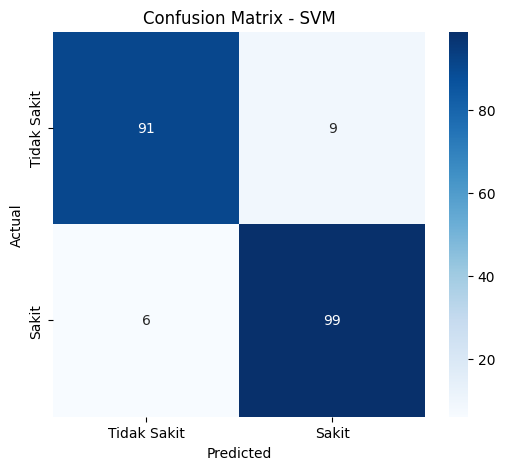

In [31]:
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Tidak Sakit', 'Sakit'],
    yticklabels=['Tidak Sakit', 'Sakit']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

## Penyimpanan Model

Model Support Vector Machine dan StandardScaler disimpan ke dalam file
berekstensi `.pkl`. Penyimpanan ini bertujuan agar model dapat digunakan
kembali tanpa perlu melakukan proses pelatihan ulang, khususnya untuk
implementasi ke dalam aplikasi berbasis Flask.

In [32]:
import pickle

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model dan scaler berhasil disimpan dalam format .pkl")

Model dan scaler berhasil disimpan dalam format .pkl


## Kesimpulan

Berdasarkan hasil pengujian, algoritma Support Vector Machine (SVM)
mampu melakukan klasifikasi penyakit jantung dengan performa yang baik.
Proses standardisasi data terbukti membantu meningkatkan kinerja model.

Model ini dapat digunakan sebagai sistem pendukung keputusan untuk
memprediksi kondisi pasien berdasarkan data medis yang diinputkan.
Pengembangan selanjutnya dapat dilakukan dengan hyperparameter tuning
atau membandingkan performa dengan algoritma machine learning lainnya.